# Lab 6 - Mathematical Distributions

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import random as py_random
import numpy.random as np_random
import time
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from pprint import pprint
from scipy.stats import norm
from scipy import stats
from scipy.stats import gamma

sns.set(style="whitegrid")

## Problem 1

The following data are measurements (in millimeters) of rainbow trout caught in the Arolik River of Alaska. Our order of operations are:

1. Do EDA for the variable.
2. Create a mean model with error bounds using the more appropriate approach, and interpret the model.
3. What do we think the data generating story is?
4. Create a distributional model for the data and make three predictions with it.

In [3]:
trout = [572.4, 417.9, 423.3, 559.9, 459.0, 416.9, 534.4, 464.4, 476.3, 423.9, 466.0,
 437.0, 471.4, 486.2, 483.5, 470.0, 533.7, 419.5, 475.5, 485.8, 533.7, 529.5,
 464.6, 436.3, 448.0, 523.8, 457.2, 456.1, 458.0, 583.9, 455.7, 461.4, 482.9,
 505.5, 373.4, 372.3, 518.0, 472.6, 529.9, 536.3, 509.6, 475.3, 471.9, 477.1,
 488.5, 458.6, 543.6, 499.5]

## 1.1 EDA

The data we are working with is lengths of rainbow trout caught in the Arolik River of Alaska. All measurements are in millimeters. According to National Geographic, the average length of a Rainbow Trout is 20-30 inches, or 508-762 millimeters, and they are only native to the lakes and rivers of North America, though they have been introduced around the world.

The data is given as a python list. Our first step is to create a Pandas dataframe using the list, which will aid us in our single-variable EDA.

In [4]:
trout = pd.DataFrame(trout)

Now that we have our dataframe, we can get some more info about the data.

In [5]:
trout.describe()

,0
count,48.000000
mean,479.170833
std,46.597274
min,372.300000
25%,456.925000
50%,473.950000
75%,511.700000
max,583.900000


We see that our data contains 48 values. We also observe that the mean is 479.17, the min is 372.30 and the max is 583.90.

To visualize the trout data, we can use a box and whiskers plot.

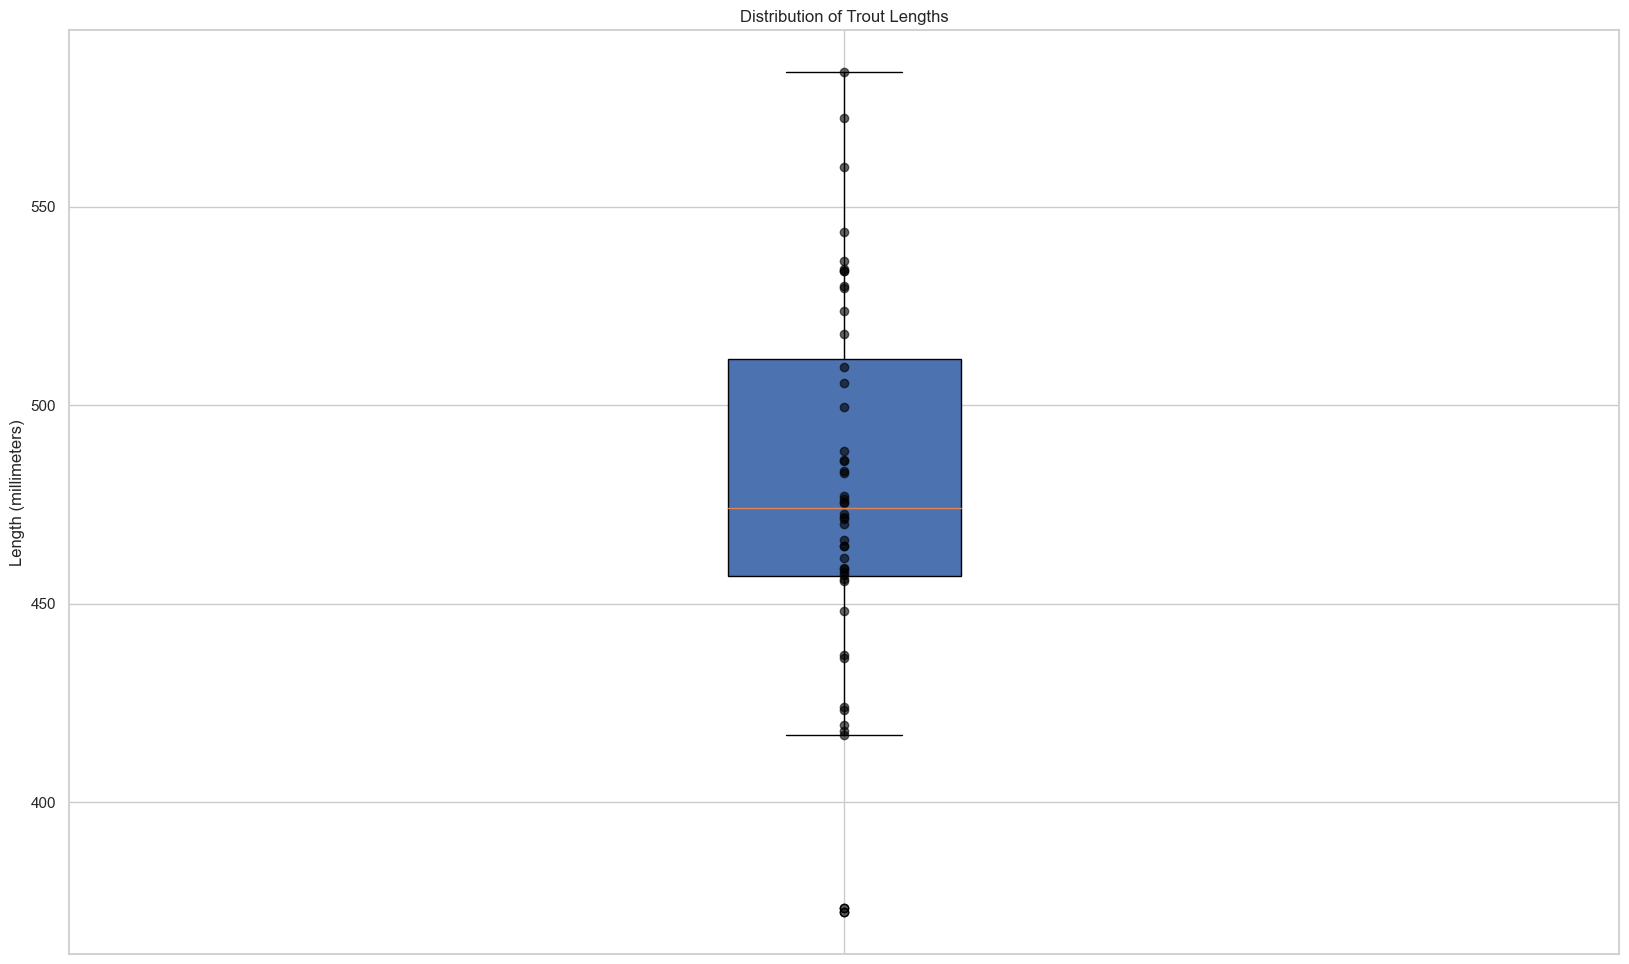

In [6]:
figure = plt.figure(figsize=(20, 12))
axes = figure.add_subplot(1, 1, 1)
patch = axes.boxplot(trout, labels=[''], showfliers=True, patch_artist=True)
# eda.restyle_boxplot( patch)
axes.set_title("Distribution of Trout Lengths")
axes.set_ylabel("Length (millimeters)")
x = np.random.normal(1, 0.000, size=len(trout))
axes.plot(x, trout, 'o', alpha=0.6, color="Black", zorder=2)
plt.show()
plt.close()

We notice that there are some somewhat extreme values of smaller fish that are below 400mm in length. One of these is responsible for the minimum measured length being 372.30mm. We also note that the main clump is around the 475 mark, which is consistent with our 50% value of 473.95.

We can also use a histogram to see these values relative to one another. 

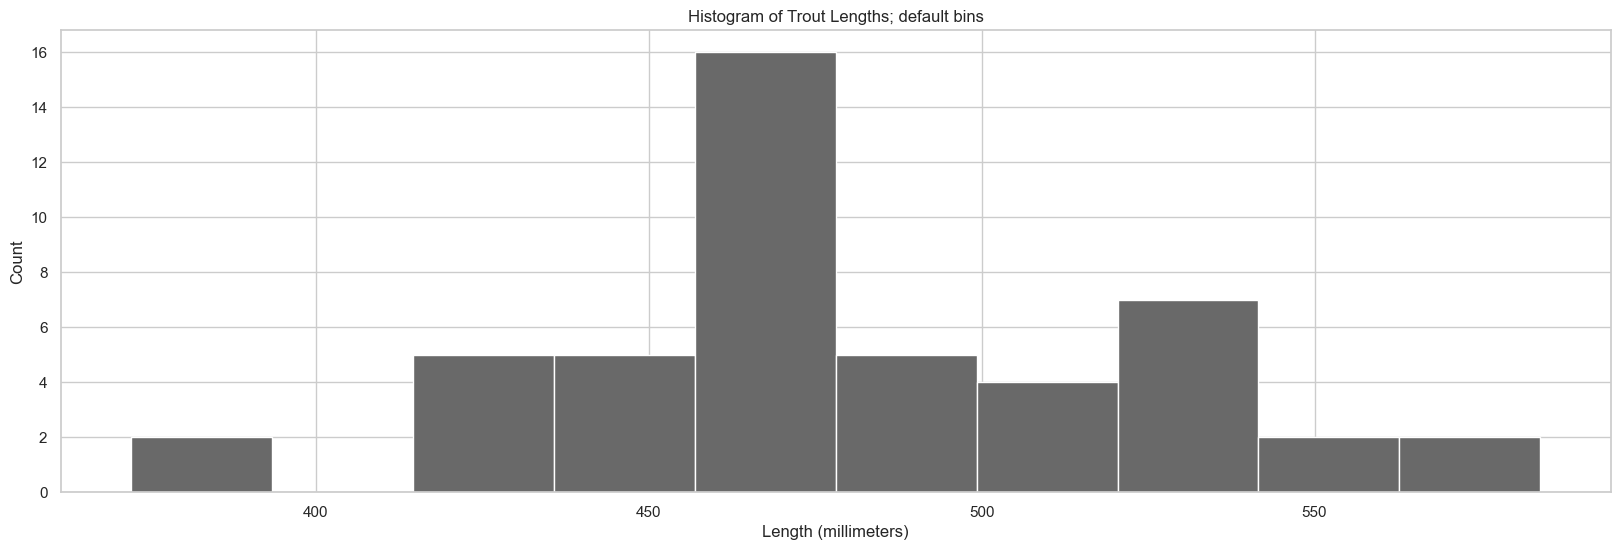

In [7]:
figure = plt.figure(figsize=(20, 6))
axes = figure.add_subplot(1, 1, 1)
axes.hist(trout, color="DimGray")
axes.set_xlabel( "Length (millimeters)")
axes.set_ylabel( "Count")
axes.set_title("Histogram of Trout Lengths; default bins")
plt.show()
plt.close()

We observe that the majority of trout are around 470 mm in length, and that the distribution follows some sort of pattern. 

We can also try increasing the number of bins to see if we can extract any more information.

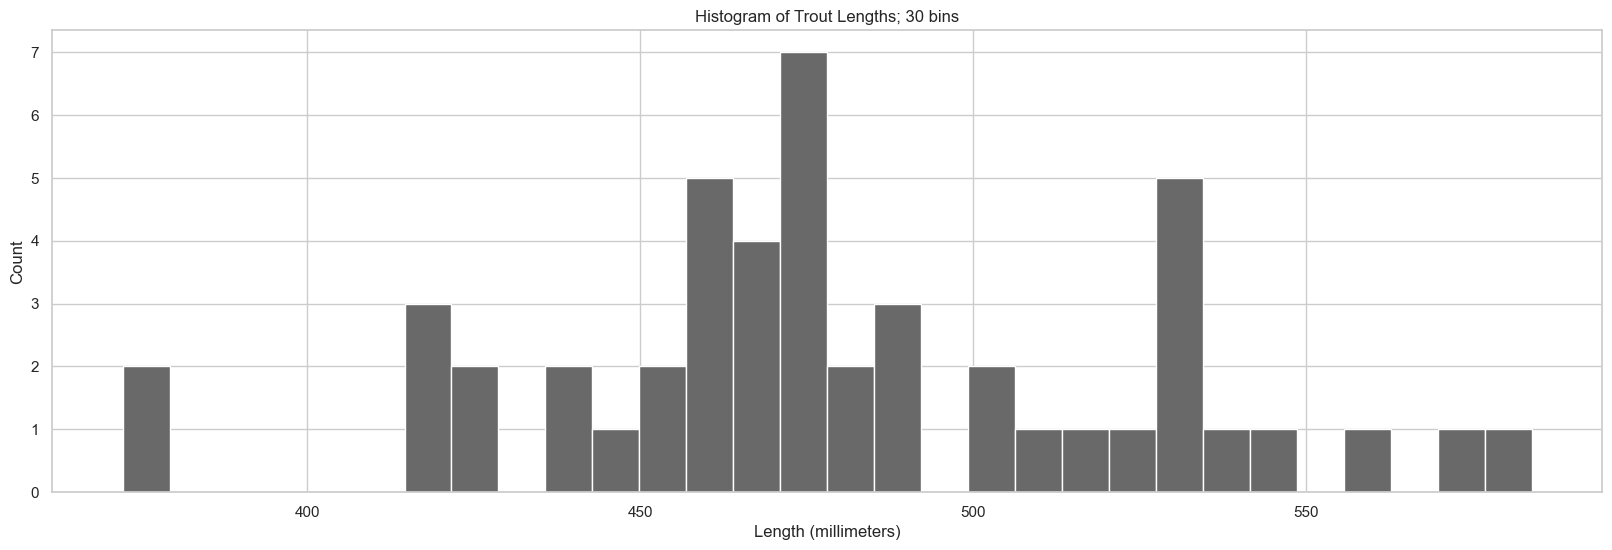

In [8]:
figure = plt.figure(figsize=(20, 6))
num_bins = 30
axes = figure.add_subplot(1, 1, 1)
axes.hist(trout, bins = num_bins, color="DimGray")
axes.set_xlabel( "Length (millimeters)")
axes.set_ylabel( "Count")
axes.set_title("Histogram of Trout Lengths; 30 bins")
plt.show()
plt.close()

We increased the number of bins to 30 and the data looks somewhat more uniform.

## 1.2 Mean Model

We create a mean model to serve as a constant model. In other words, if we were to pull a random trout out of the Arolik River in Alaska, what single value would we predict as it's length?

To create our mean model, we first define our loss function. We intend for overestimates and underestimates to be treated symmetrically, and for large errors to be given more weight than small errors. Thus, we choose our loss function to be Mean Squared Error. Because we have chosen Mean Squared Error to be our loss function, and the constant model that will minimize MSE is the mean, we choose the mean as our constant model.

To create a mean model for our trout data, we can take the mean value generated from our descriptive statistics above. We found that the mean trout length of our data is 479.17 mm, and the standard deviation of the trout length data is 46.60 mm. 

As a predictive model, we can say that the length of a random trout pulled from the same river will be around 479.17 mm. 

In order to provide error bounds on our prediction, we have two options. If the data is approximately normally distributed, we can put bounds on our error of 1.96 standard deviations from the mean. If they are not, we can use Chebyshev's inequality, which states that $1 - \frac{1}{k^2}$ percent of the data must be within $k$ standard deviations from the mean. 

Since the data seems to be approximately normally distributed (not necessarily actually normally distributed), we will use 1.96 standard deviations from the mean as our error bounds. In our case, that's 387.83-570.51 mm.

Thus, we can say that our mean model predicts that a random trout will be 479.17mm, with a 95% chance of the length being between 387.83 and 570.51 mm.

## 1.3 Data Generating Story

Our data generating story is that the length of a rainbow trout is determined by multiple factors, such as genetics and diet. The different factors that determine the lengths of trout are likely percentages of some base of these attributes. Thus, we can say that the length of trout results from a process where the random variable influences the outcome in a multiplicative or proportional way.

## 1.4.a Distributional Model

Based on our data generating story above, the model that seems most likely to represent our distribution is a Log-Gaussian distribution. 

First we try a regular Gaussian distribution so that we can compare it to a Log-Gaussian distribution afterwards. 

/Users/christianznidarsic/anaconda3/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3462: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


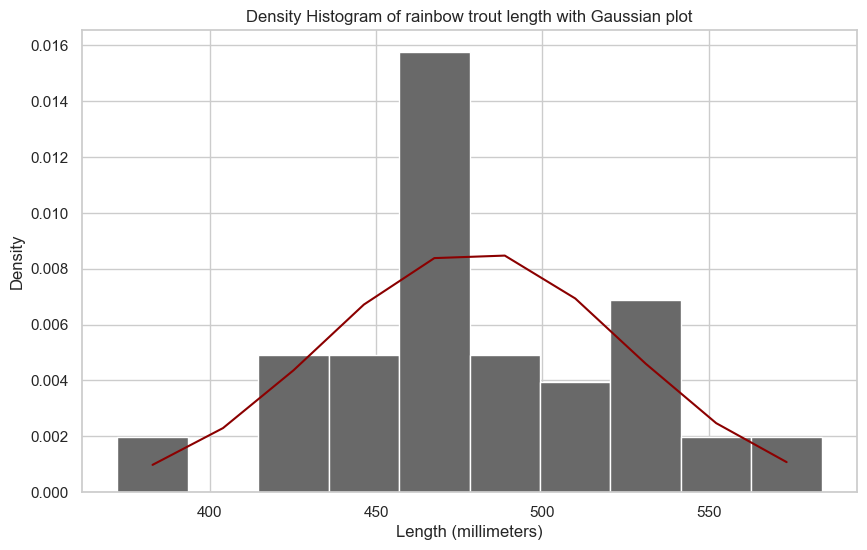

In [9]:
figure = plt.figure(figsize=(10,6))
axes = figure.add_subplot(1, 1, 1)
n, bins, patches = axes.hist(trout, color="DimGray", density=True, bins=10)
axes.set_xlabel("Length (millimeters)")
axes.set_ylabel("Density")
axes.set_title("Density Histogram of rainbow trout length with Gaussian plot")

xs = [(b2 + b1)/2 for b1, b2 in zip(bins, bins[1:])]
mean = np.mean(trout)
std  = np.std(trout)
ys = [norm.pdf(k, loc=mean, scale=std) for k in xs]
axes.plot(xs, ys, color="darkred")
plt.show()
plt.close()

We can see that the regular Gaussian distribution seems to underestimate the values around the 470 range, which is near the median.

We can use a QQ-plot to compare distributions of data (and the reference distribution) by quantiles. If our reference distribution is similar to our empirical distribution, then the empirical quantiles and theoretical quantiles should appear near the $x = y$ line.

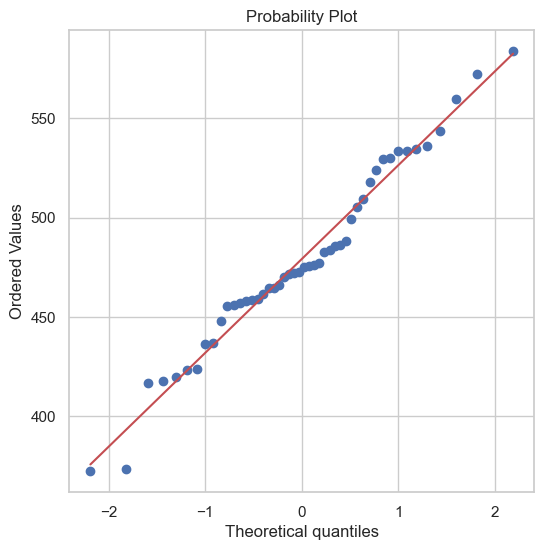

In [10]:
figure = plt.figure(figsize=(6, 6))
axes = figure.add_subplot(1, 1, 1)
stats.probplot(trout[0], dist="norm", plot=axes)
plt.show()
plt.close()

We observe that our plotted empirical and theoretical quantiles do line up well with the $y = x$ line. Thus, the regular Gaussian distribution seems to be a pretty close model for our empirical distribution.

However, from our data generating story, we determined that the empirical data is likely most closely modeled using a Log-Gaussian distribution. Thus, we plot it here to compare.

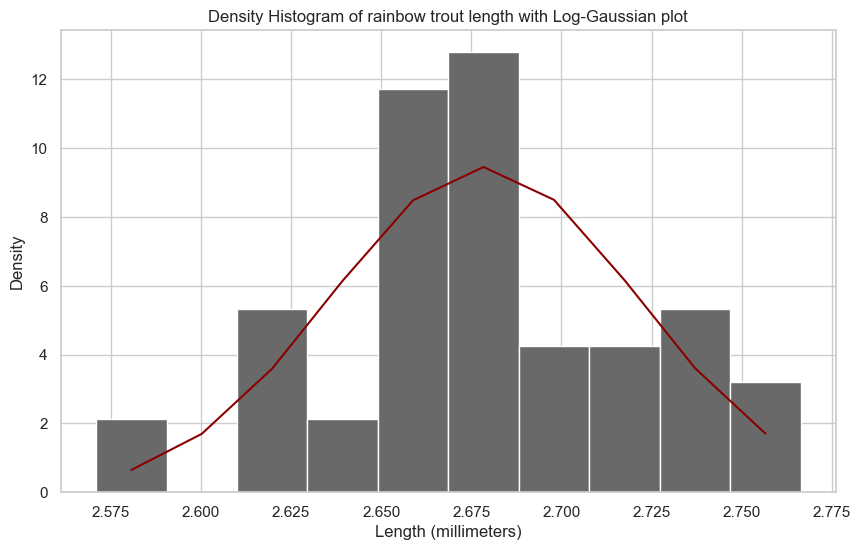

In [11]:
trout["log_length"] = trout[0].apply(lambda x: np.log10(x))

figure = plt.figure(figsize=(10,6))
axes = figure.add_subplot(1, 1, 1)
n, bins, patches = axes.hist(trout["log_length"], color="DimGray", density=True, bins=10)
axes.set_xlabel("Length (millimeters)")
axes.set_ylabel("Density")
axes.set_title("Density Histogram of rainbow trout length with Log-Gaussian plot")

xs = [(b2 + b1)/2 for b1, b2 in zip(bins, bins[1:])]
mean = np.mean(trout["log_length"])
std  = np.std(trout["log_length"])
ys = [norm.pdf(k, loc=mean, scale=std) for k in xs]
axes.plot(xs, ys, color="darkred")
plt.show()
plt.close()

Our empirical data seems to line up better with the Log-Gaussian distribution compared to the regular Gaussian distribution. It seems that our prediction was correct, and our empirical data was produced from a process most similar to that which results in a Log-Gaussian distribution.

Similar to what we did above, we can use a QQ-plot to view the similarity of our approximation and our empirical data.

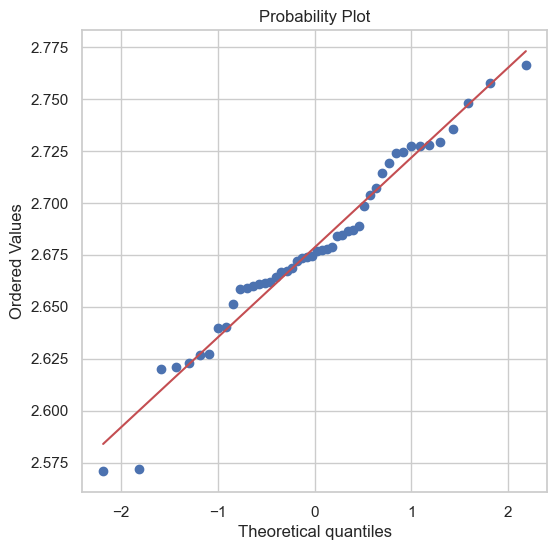

In [12]:
figure = plt.figure(figsize=(6, 6))
axes = figure.add_subplot(1, 1, 1)
stats.probplot(trout["log_length"], dist="norm", plot=axes)
plt.show()
plt.close()

The approximation fits closely with our data, which supports our choice of model.

## 1.4.b Predictions

Now we wish to make some predictions. 

1. What is the probability of a random fish being 511.7 mm or greater?

In order to answer this question, we use the Survival Function.

In [13]:
mean = np.mean(trout["log_length"])
std  = np.std(trout["log_length"])

stats.norm.sf(np.log10(511.7), mean, std)

0.2344930634654474

Our model predicts that there is a 23.44% chance that a random fish pulled from the river will be as long or longer that 511.7 mm.

2. What is the probability of a random fish being 400 mm or shorter?

In order to answer this question, we use the Cumulative Distribution Function (CDF). 

In [14]:
stats.norm.cdf(np.log10(400), mean, std)

0.03512307178407041

Our model predicts that there is only a 3.5% chance that the random trout is as short or shorter than 400 mm. This result makes sense given our descriptive statistics and our visualization. The smallest value in our data is 372.3 mm after all.



3. What is the probability of a random fish being between 500 mm and 550 mm?

In order to answer this question, we use the Cumulative Distribution Function (CDF). However, this time we subtract the likelihood of the CDF of 500 mm from the CDF of 550 mm.

In [15]:
stats.norm.cdf(np.log10(550),mean,std) - stats.norm.cdf(np.log10(500),mean,std)

0.24225598935787418

Our model predicts that there is a 24.2% chance of a random fish being between 500 mm and 550 mm long.

## Problem 2

The following data represent the number of days it takes a software team to clear tickets.

1. Do EDA for the variable.
2. Create a mean model with error bounds using the more appropriate approach, and interpret the model.
3. What do you think the data generating story is?
4. Create a distributional model for the data and make three predictions with it.

In [16]:
days = [8.0, 3.8, 4.0, 1.6, 2.6, 3.4, 8.7, 4.7, 6.1, 1.9, 6.0, 8.2, 2.7, 6.5, 1.9, 2.7,
 1.6, 1.3, 2.3, 3.3, 9.8, 8.3, 3.3, 4.3, 4.7, 7.2, 5.8, 3.3, 2.0, 3.2, 1.7, 2.5,
 1.6, 4.0, 4.1, 1.0, 2.7, 5.3, 7.6, 1.5, 7.1, 2.5, 2.6, 4.0, 1.3, 7.0, 4.0, 8.4,
 1.3, 5.1, 6.4, 3.1, 1.5, 4.1, 2.5, 5.5, 2.4, 1.4, 2.6, 1.9, 2.1, 2.0, 2.5, 2.2,
 2.6, 3.1, 3.6, 1.8, 3.1, 4.6, 1.2, 5.4, 6.5, 7.0, 9.7, 6.6, 9.1, 6.9, 2.5, 8.5,
 5.0, 3.2, 0.9, 3.3, 2.9, 3.9, 12.1, 3.4, 2.9, 4.6, 4.5, 1.7, 1.2, 3.6, 3.9,
 14.2, 5.3, 1.2, 0.3, 2.3, 2.9, 2.5, 0.8, 1.6, 2.7, 4.6, 4.4, 2.7, 3.5, 0.6,
 4.9, 2.2, 5.4, 6.0, 1.8, 1.0, 1.5, 4.0, 2.1, 5.6, 4.1, 1.9, 1.7, 3.8, 5.7, 4.1,
 2.3, 5.1, 8.4, 4.8, 3.7, 2.2, 2.6, 2.8, 0.5, 3.9, 2.9, 3.7, 2.6, 2.5, 11.7,
 3.3, 1.5, 7.3, 1.1, 0.3, 0.9, 0.5, 8.4, 2.8, 6.1, 3.4, 4.7, 10.0, 1.9, 5.8,
 6.4, 4.6, 0.4, 6.8, 5.3, 3.9, 1.2, 2.6, 3.4, 2.4, 3.7, 14.5, 10.3, 0.1, 0.8,
 0.4, 9.8, 6.3, 4.5, 1.0, 2.8, 5.6, 1.4, 1.7, 2.5, 1.7, 1.6, 23.0, 0.2, 3.1,
 1.5, 0.7, 2.4, 4.2, 3.0, 2.0, 8.3, 2.5, 4.4, 3.0, 5.2, 4.3, 4.7, 5.4, 1.1, 1.8,
 9.9, 2.9, 3.0, 5.8, 2.0, 0.6, 3.1, 8.2, 5.7, 4.7, 8.4, 4.1, 3.4, 2.7, 9.3, 0.6,
 0.5, 1.8, 8.4, 3.4, 10.9, 6.0, 11.3, 2.9, 1.9, 3.3, 1.7, 11.5, 6.9, 6.4, 7.4,
 2.4, 1.3, 0.7, 15.5, 4.2, 2.5, 2.0, 6.2, 3.7, 3.5, 5.3, 4.1, 2.6, 0.9, 3.1,
 1.5, 1.7, 1.8, 0.9, 0.7, 1.2, 5.0, 3.8, 3.7, 7.2, 4.0, 2.9, 16.4, 1.2, 6.8,
 0.5, 2.4, 7.7, 5.5, 4.6, 5.5, 0.3, 4.2, 5.1, 0.5, 7.0, 1.1, 0.6, 0.8, 2.2, 8.6,
 1.5, 2.8, 3.2, 7.4, 3.6, 7.9, 3.0, 3.4, 4.8, 1.9, 1.6, 0.7, 4.6, 4.3, 2.6, 7.4,
 0.1, 1.8, 6.7, 0.4, 2.0, 2.8, 2.4, 5.4, 1.2, 4.2, 3.8, 5.6, 3.0, 2.8, 5.4, 6.7,
 2.5, 3.4, 5.0, 3.7, 2.4, 3.6, 5.9, 1.9, 9.9, 4.0, 4.9, 1.9, 2.9, 3.9, 2.9, 5.5,
 8.1, 3.6, 2.1, 5.1, 11.1, 9.0, 1.8, 3.7, 1.0, 1.4, 3.9, 3.2, 0.9, 2.0, 4.5,
 2.5, 7.5, 2.5, 1.5, 0.6, 3.1, 6.0, 2.6, 1.9, 5.5, 8.7, 1.4, 2.9, 1.2, 8.1, 4.8,
 3.8, 0.6, 3.1, 6.5, 5.4, 6.3, 4.3, 7.1, 5.2, 3.7, 3.4, 1.9, 1.9, 1.0, 6.5, 2.8,
 3.6, 2.2, 3.8, 5.9, 4.6, 5.4, 2.9, 1.1, 9.5, 5.0, 13.2, 5.7, 2.2, 4.2, 3.8,
 1.4, 1.0, 2.0, 6.3, 1.8, 4.2, 1.8, 2.2, 12.4, 5.9, 5.3, 1.1, 5.6, 4.6, 2.4,
 5.4, 4.5, 0.9, 5.5, 13.9, 0.8, 3.1, 1.3, 5.7, 6.3, 2.5, 0.5, 10.1, 1.4, 1.5,
 3.8, 1.6, 4.7, 5.8]

## 2.1 EDA

The data we are working with is the number of days it takes a software team to clear tickets. It is difficult to gather domain knowledge for this data, as different teams work in different ways. However, from the data we can see that most tickets take approximately 5 days to complete.

The data is given as a python list. Our first step is to create a Pandas dataframe using the list, which will aid us in our single-variable EDA.

In [17]:
days = pd.DataFrame(days)

Now that we have our dataframe, we can get some more info about the data.

In [18]:
days.describe()

,0
count,423.000000
mean,4.030969
std,2.937204
min,0.100000
25%,1.900000
50%,3.400000
75%,5.400000
max,23.000000


We see that our data contains 423 values. We also observe that the mean is 4.03, the min is 0.10 and the max is 23.00.

To visualize the data, we can use a box and whiskers plot.

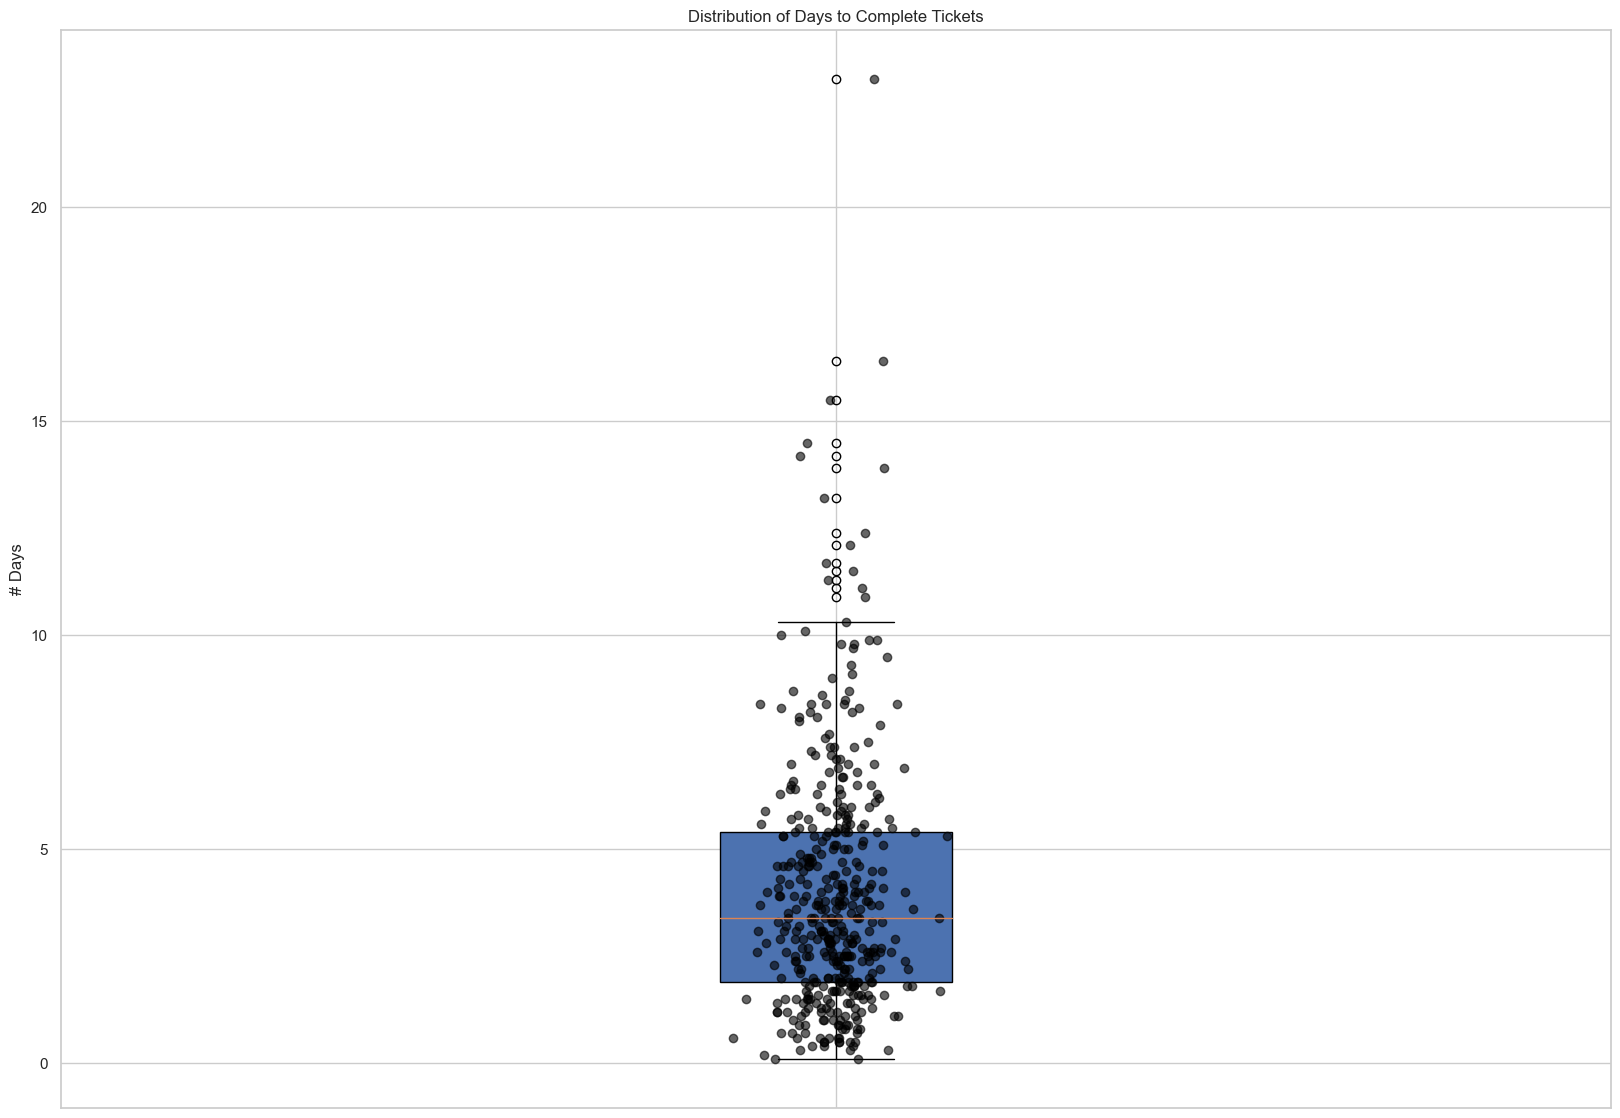

In [19]:
figure = plt.figure(figsize=(20, 14))
axes = figure.add_subplot(1, 1, 1)
patch = axes.boxplot(days, labels=[''], showfliers=True, patch_artist=True)
# eda.restyle_boxplot( patch)
axes.set_title("Distribution of Days to Complete Tickets")
axes.set_ylabel("# Days")
x = np.random.normal(1, 0.02, size=len(days))
axes.plot(x, days, 'o', alpha=0.6, color="Black", zorder=2)
plt.show()
plt.close()

In order to improve readability, we added jitter to the x-axis. The jitter separates overlapping values and makes it easier to see the distribution of data.

We notice that there are some somewhat extreme values of days to complete tasks. In particular, there were two tasks that took more than 20 days to complete. We also notice that the majority of tasks are completed in the 0 to 10 day range, with the median being around 3.4.

We can also use a histogram to see these values relative to one another. 

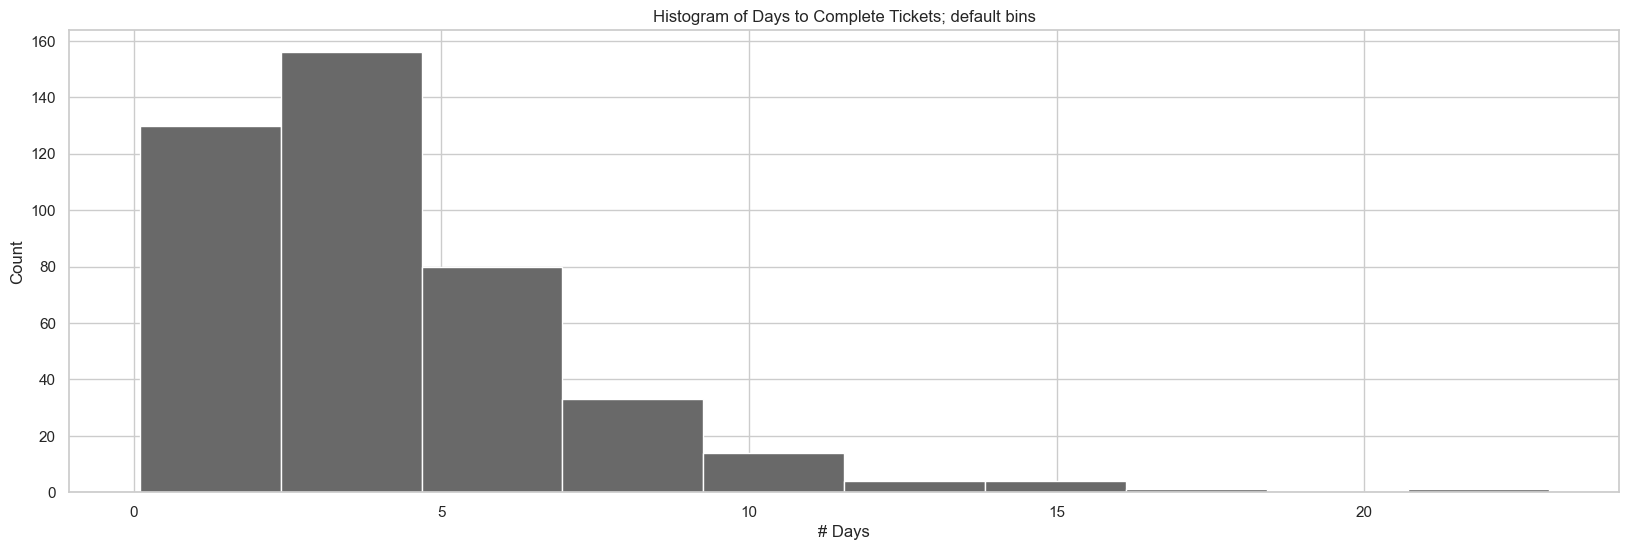

In [20]:
figure = plt.figure(figsize=(20, 6))
axes = figure.add_subplot(1, 1, 1)
axes.hist(days, color="DimGray")
axes.set_xlabel( "# Days")
axes.set_ylabel( "Count")
axes.set_title("Histogram of Days to Complete Tickets; default bins")
plt.show()
plt.close()

We observe that the majority of orders are completed within 5 days. The distribution also seems to follow a particular pattern.

We can also try increasing the number of bins to see if we can extract any more information.

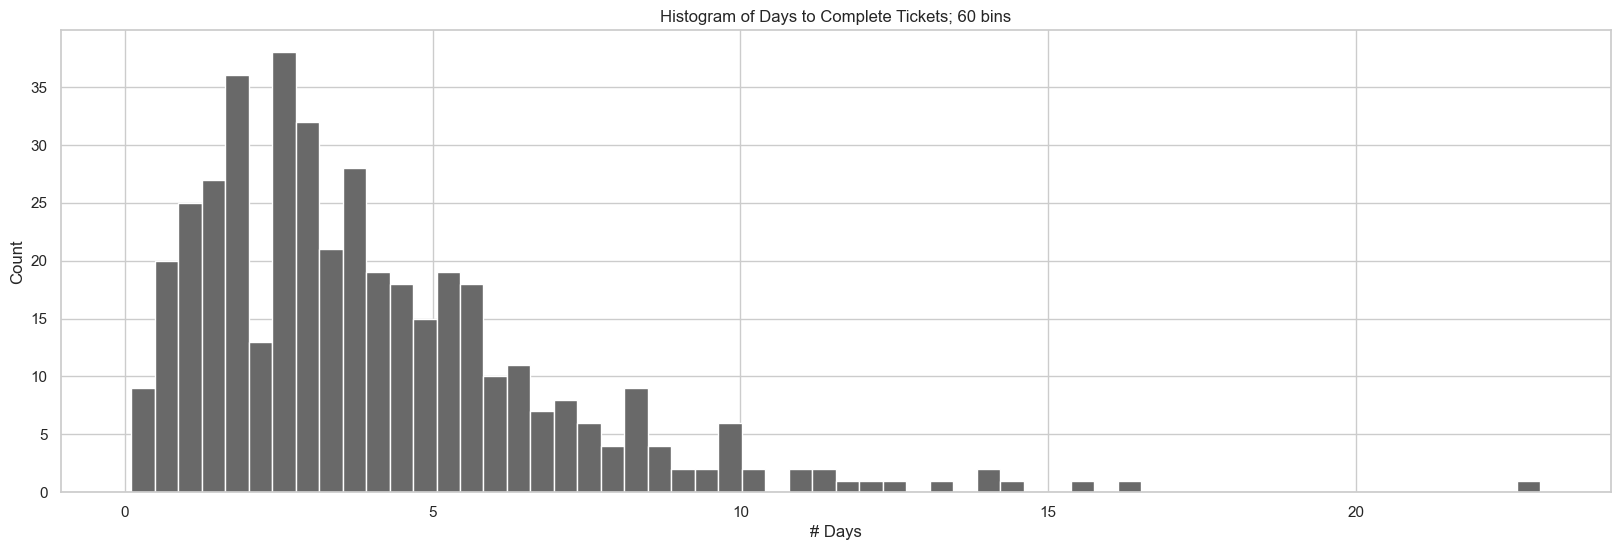

In [21]:
figure = plt.figure(figsize=(20, 6))
num_bins = 60
axes = figure.add_subplot(1, 1, 1)
axes.hist(days, bins = num_bins, color="DimGray")
axes.set_xlabel( "# Days")
axes.set_ylabel( "Count")
axes.set_title("Histogram of Days to Complete Tickets; 60 bins")
plt.show()
plt.close()

We increased the number of bins to 60 and the data looks more uniform.

## 2.2 Mean Model

We create a mean model to serve as a constant model. In other words, if we were to pull a random ticket, what single value would we predict as the number of days it took to complete?

To create our mean model, we first define our loss function. We intend for overestimates and underestimates to be treated symmetrically, and for large errors to be given more weight than small errors. Thus, we choose our loss function to be Mean Squared Error. Because we have chosen Mean Squared Error to be our loss function, and the constant model that will minimize MSE is the mean, we choose the mean as our constant model.

To create a mean model for our data, we can take the mean value generated from our descriptive statistics above. We found that the mean days to complete a task is 4.031 days, and the standard deviation of the data is 2.937 days.

As a predictive model, we can say that the number of days to complete a random ticket will be about 4.031 days. 

In order to provide error bounds on our prediction, we have two options. If the data is approximately normally distributed, we can put bounds on our error of 1.96 standard deviations from the mean. If they are not, we can use Chebyshev's inequality, which states that $1 - \frac{1}{k^2}$ percent of the data must be within $k$ standard deviations from the mean. 

Since the data does not seem to be approximately normally distributed, we will use Chebyshev's inequality. We choose a value of $k = 1.2$ and find that our error bounds predict that 31% of our data is within 0.507 - 7.555 days.

Thus, we can say that our mean model predicts that a random ticket will take 4.031 days, with a 31% chance of the length being between 0.507 and 7.555 days.

## 2.3 Data Generating Story

Our data generating story is that tickets are completed at a constant average rate, and the days to complete them can be considered to be the waiting times between Poisson distributed events. We can also say that these tickets are solvable in $n$ ways, and peopel generally try the fastest solution first, which results in an Exponential distribution. If these tasks are each of a different difficulty, then they will tend to follow a Gamma distribution, which is a more general form of the Exponential distribution. Thus, some (fewer) tasks are more difficult to complete and therefore take longer.

## 2.4.a Distributional Model

Based on our data generating story above, the model that seems most likely to represent our distribution is a Gamma Distribution.

To get a sense of whether a Gamma Distribution is indeed a good fit for our empirical data, we will chart a histogram of our data with a parameterized Gamma Distribution overlayed on top. First, we try a Gaussian distribution as a baseline.

/Users/christianznidarsic/anaconda3/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3462: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


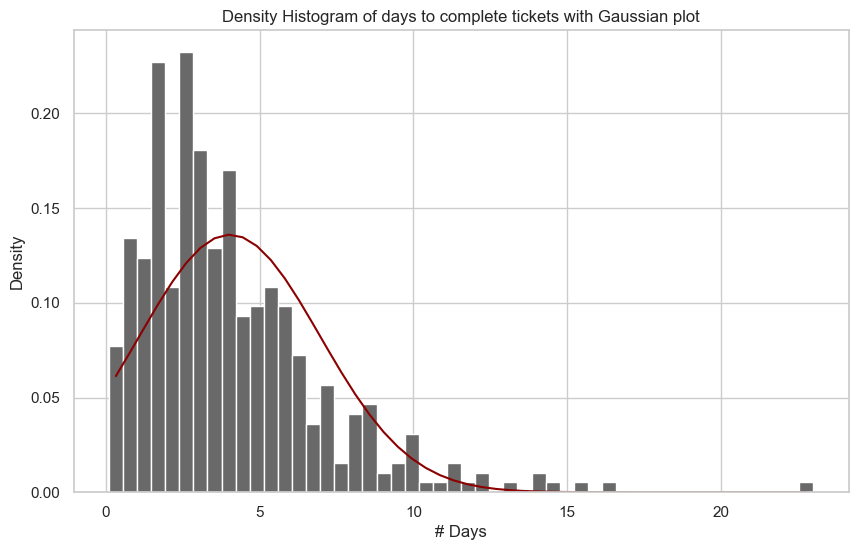

In [22]:
figure = plt.figure(figsize=(10,6))
axes = figure.add_subplot(1, 1, 1)
n, bins, patches = axes.hist(days, color="DimGray", density=True, bins=50)
axes.set_xlabel("# Days")
axes.set_ylabel("Density")
axes.set_title("Density Histogram of days to complete tickets with Gaussian plot")

xs = [(b2 + b1)/2 for b1, b2 in zip(bins, bins[1:])]
mean = np.mean(days)
std  = np.std(days)
ys = [norm.pdf(k, loc=mean, scale=std) for k in xs]
axes.plot(xs, ys, color="darkred")
plt.show()
plt.close()

As we expected, the Gaussian distribution does not seem to be a good fit for our data. It underestimates for small values and overestimates for medium-large values.

Now we will use a Gamma distribution instead.

/Users/christianznidarsic/anaconda3/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3462: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/Users/christianznidarsic/anaconda3/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3462: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


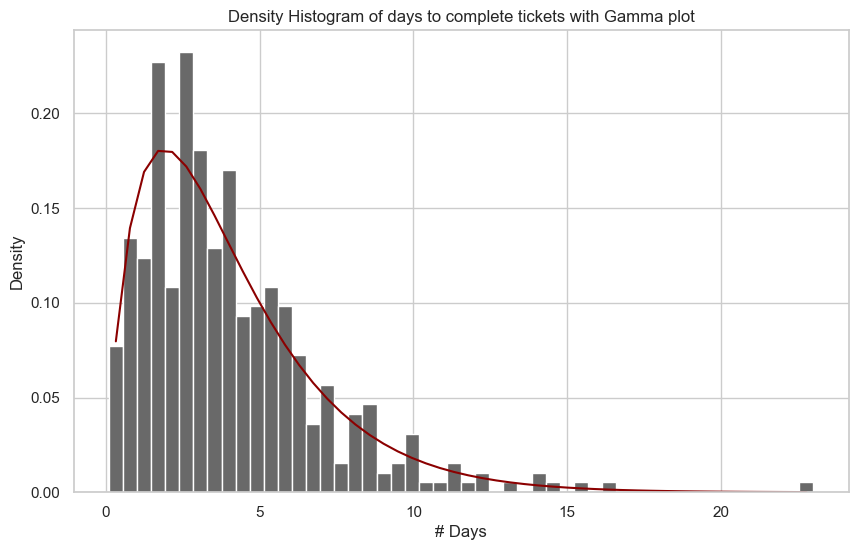

In [23]:
m1 = np.mean(days)
m2 = np.var(days)

# Shape parameter
_k = (m1*m1)/m2
# Scale parameter
theta = m2/m1


figure = plt.figure(figsize=(10,6))
axes = figure.add_subplot(1, 1, 1)
n, bins, patches = axes.hist(days, color="DimGray", density=True, bins=50)
axes.set_xlabel("# Days")
axes.set_ylabel("Density")
axes.set_title("Density Histogram of days to complete tickets with Gamma plot")

xs = [(b2 + b1)/2 for b1, b2 in zip(bins, bins[1:])]

mean = np.mean(days)
std  = np.std(days)
ys = [gamma.pdf(k, loc=0, scale=theta, a=_k) for k in xs]
axes.plot(xs, ys, color="darkred")
plt.show()
plt.close()

We observe that the Gamma distribution is a much better fit for our data than the regular Gaussian distribution. The Gamma distribution tapers off as # days increases in a similar way to the empirical data. It also starts off with a much higher density, which also matches the data.

In order to validate our choice of a Gamma distribution for our data, we can use a QQ-plot.

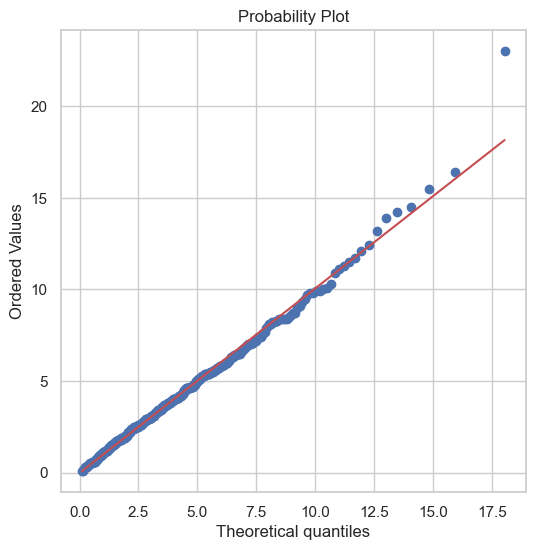

In [24]:
figure = plt.figure(figsize=(6, 6))
axes = figure.add_subplot(1, 1, 1)
shape_parameter = _k
scale_parameter = theta
stats.probplot(days[0], dist=stats.gamma(shape_parameter, scale=scale_parameter), plot=axes)
plt.show()
plt.close()

We observe that our plotted empirical and theoretical quantiles do line up well with the $y = x$ line. Thus, the Gamma distribution seems to be a pretty close model for our empirical distribution.

## 2.4.b Predictions

Now we wish to make some predictions. 

1. What is the probability of a random ticket taking 5 days or more?

In order to answer this question, we use the Survival Function.

In [43]:
mean = np.mean(days)
std  = np.std(days)

stats.norm.sf(5, mean, std)

/Users/christianznidarsic/anaconda3/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3462: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


array([0.37058411])

Our model predicts that there is a 50.42% percent chance that a random ticket will take more than 5 days to complete. This is about what we expect, since our mean is close to 4.

2. What is the probability of a random ticket taking 1 day or less?

In order to answer this question, we use the Cumulative Distribution Function (CDF). 

In [26]:
stats.norm.cdf(1, mean, std)

array([0.15076796])

Our model predicts that there is only a 15% chance that a random ticket will be completed in 1 day or less. This is about what we expect, since most tickets take more than 1 day to complete.

3. What is the probability of a random ticket taking between 2 and 3 days to complete?

In order to answer this question, we use the Cumulative Distribution Function (CDF). However, this time we subtract the likelihood of the CDF of 3 days from the CDF of 2 days.

In [27]:
stats.norm.cdf(3,mean,std) - stats.norm.cdf(2,mean,std)

array([0.11825687])

Our model predicts that there is an 11.83% chance of a random ticket taking between 2 and 3 days to complete.

## Problem 3

Following the pattern established in the previous two problems, build two models for BMI. 
(At this point, if we give you a variable and say "model it" you should know what we expect...).

In [28]:
insurance = pd.read_csv("https://raw.githubusercontent.com/fundamentals-of-data-science/datasets/master/insurance.csv", header=0)

## 3.1 EDA

'bmi' is a characteristic of a person that is included in this data set. It stands for "body mass index", which is a continuous numerical value that is derived from a person's weight and height. It is used to classify people into categories of 'underweight', 'normal weight', 'overweight' and 'obese'. In the United States, common ranges for these categories are as follows:

- 'underweight': <18.5
- 'normal_weight': 18.5 to <25
- 'overweight': 25.0 to <30
- 'obese': 30 or higher

First we print some descriptive statistics of the variable.


In [29]:
insurance['bmi'].describe()

count    1338.000000
mean       30.663397
std         6.098187
min        15.960000
25%        26.296250
50%        30.400000
75%        34.693750
max        53.130000
Name: bmi, dtype: float64

We note that there are 1338 data points, and the mean is 30.66, the min is 15.9 and the max is 53.13.

Below we plot the data using a box and whiskers chart to get a better visual sense of the distribution.

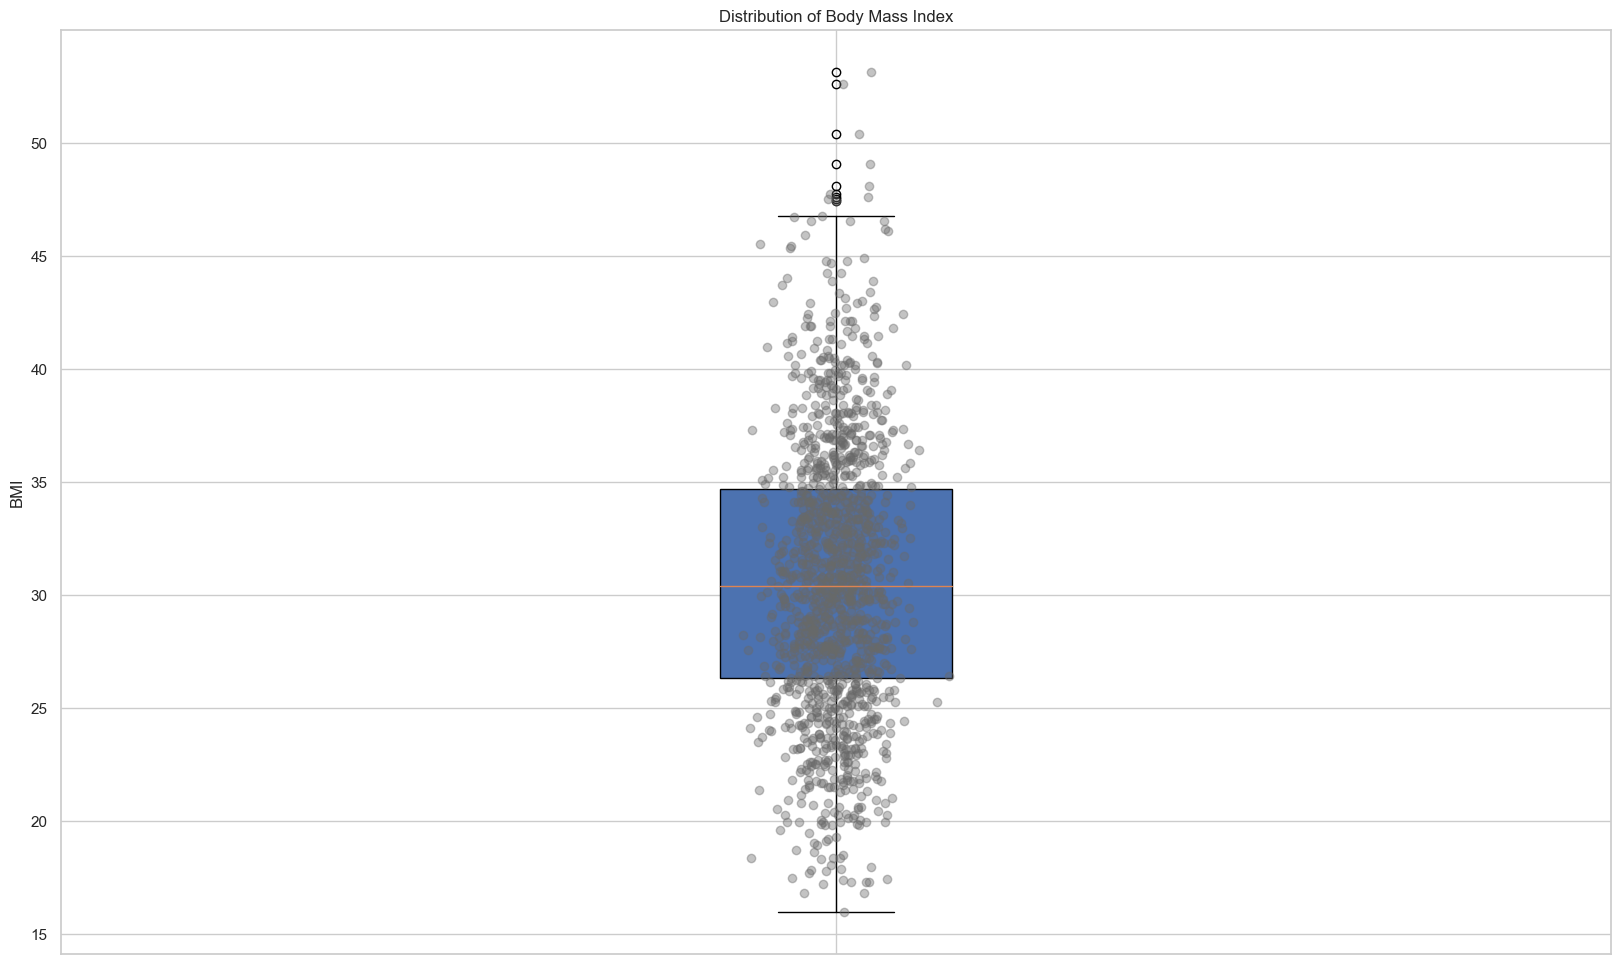

In [30]:
figure = plt.figure(figsize=(20, 12))
axes = figure.add_subplot(1, 1, 1)
patch = axes.boxplot(insurance["bmi"], labels=[''], showfliers=True, patch_artist=True)
# eda.restyle_boxplot( patch)
axes.set_title("Distribution of Body Mass Index")
axes.set_ylabel("BMI")
x = np.random.normal(1, 0.02, size=len(insurance["bmi"]))
axes.plot(x, insurance["bmi"], 'o', alpha=0.4, color="DimGray", zorder=2)
plt.show()
plt.close()

The box and whiskers plot above shows the distribution, but there are many overlapping values. To get a better sense of the distribution, we can chart our data using a bar chart. However, because 'bmi' is a continuous numerical variable, charting our data for each value will be difficult to interpret. Thus, we can use a histogram to show the distribution instead.

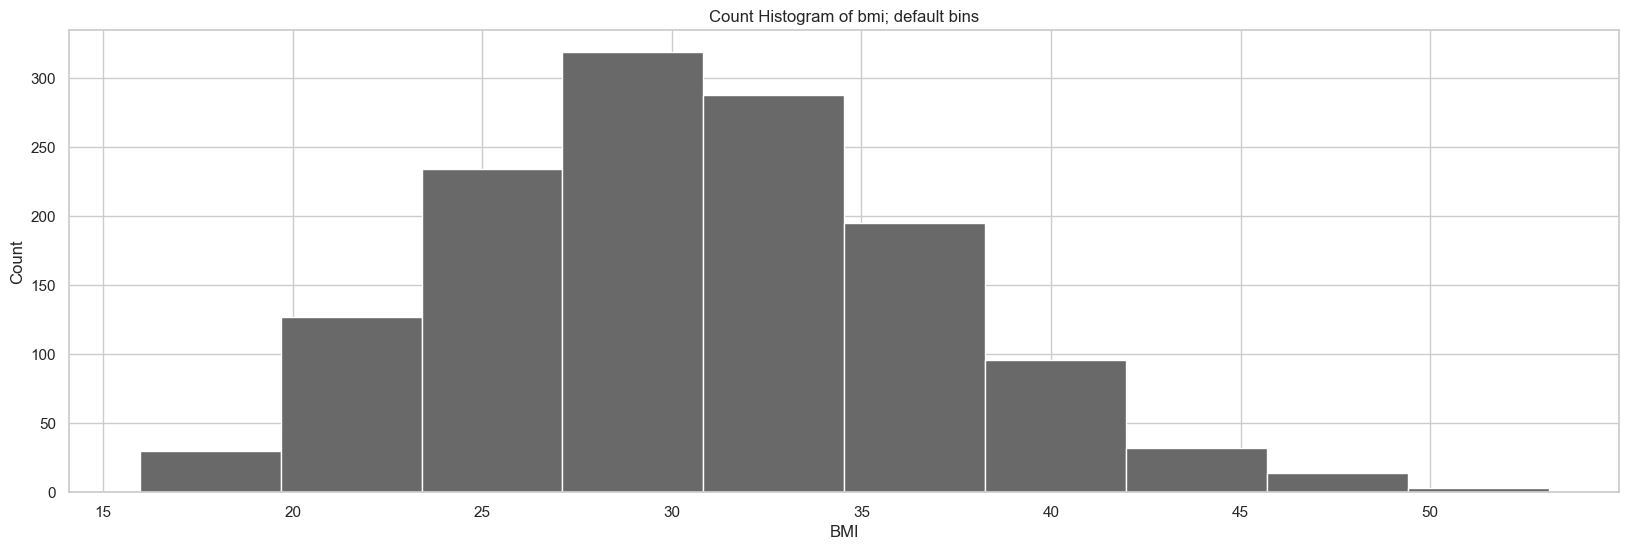

In [31]:
figure = plt.figure(figsize=(20, 6))
axes = figure.add_subplot(1, 1, 1)
axes.hist(insurance["bmi"], color="DimGray")
axes.set_xlabel( "BMI")
axes.set_ylabel( "Count")
axes.set_title("Count Histogram of bmi; default bins")
plt.show()
plt.close()

This histogram does a good job of showing the distribution of bmi values. We can see that many respondants fall in the 'obese' range. To get a better sense of the distribution, we can try adding more bins.

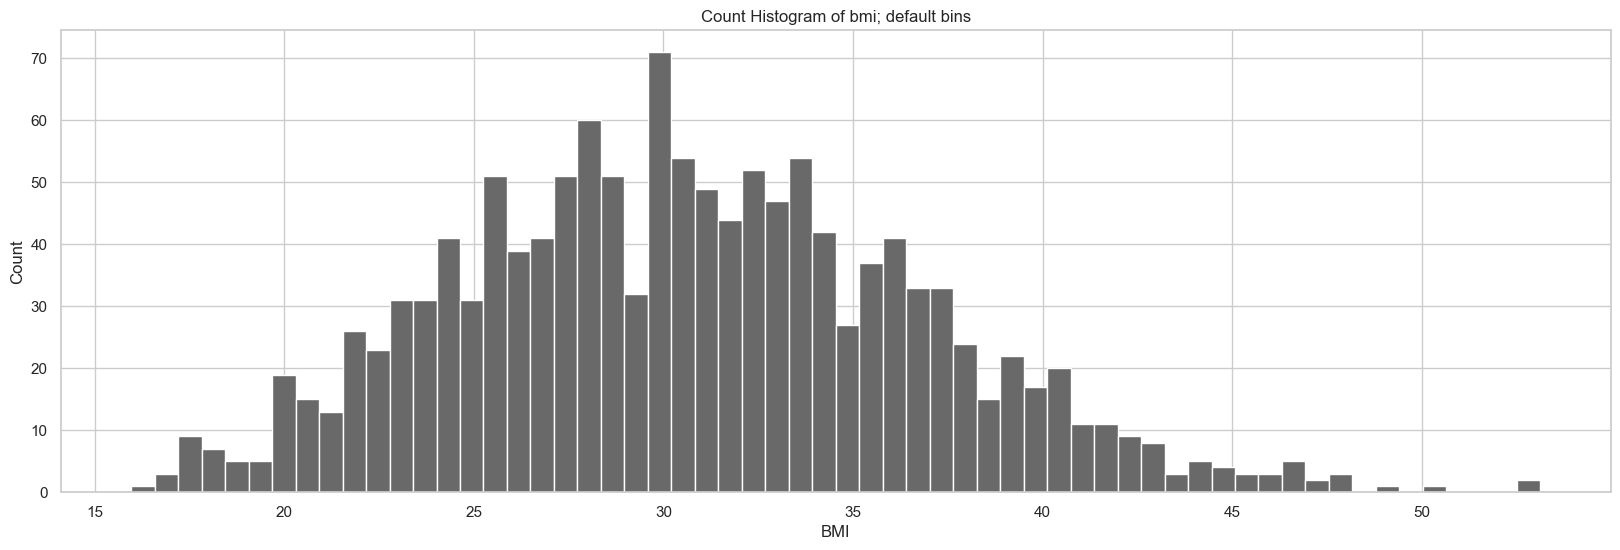

In [32]:
figure = plt.figure(figsize=(20, 6))
axes = figure.add_subplot(1, 1, 1)
axes.hist(insurance["bmi"], bins=60, color="DimGray")
axes.set_xlabel( "BMI")
axes.set_ylabel( "Count")
axes.set_title("Count Histogram of bmi; default bins")
plt.show()
plt.close()

After adding more bins, the distribution appears similar to before, but the trailing end of the distribution becomes somewhat more pronounced. We can see that the distribution is not perfectly symmetrical about the center. As BMI increases there are some extreme values making the distribution asymmetrical.

## 3.2 Mean Model

We create a mean model to serve as a constant model. In other words, if we were to pull a random person from the data, what single value would we predict as their BMI?

To create our mean model, we first define our loss function. We intend for overestimates and underestimates to be treated symmetrically, and for large errors to be given more weight than small errors. Thus, we choose our loss function to be Mean Squared Error. Because we have chosen Mean Squared Error to be our loss function, and the constant model that will minimize MSE is the mean, we choose the mean as our constant model.

To create a mean model for our data, we can take the mean value generated from our descriptive statistics above. We found that the mean BMI is 30.66, and the standard deviation of the data is 6.10.

As a predictive model, we can say that the BMI of a random person will be around 30.66. 

In order to provide error bounds on our prediction, we have two options. If the data is approximately normally distributed, we can put bounds on our error of 1.96 standard deviations from the mean. If they are not, we can use Chebyshev's inequality, which states that $1 - \frac{1}{k^2}$ percent of the data must be within $k$ standard deviations from the mean. 

Because we observed that our data does not appear to be normally distributed, we use Chebyshev's inequality. We choose a value of $k = 2$ and find that our error bounds predict that 75% of our data is within BMI values of 18.46 and 42.86.

Thus, we can say that our mean model predicts that a random person will have a BMI close to 30.66, with a 75% chance of the BMI being between 18.46 and 42.86.

## 3.3 Data Generating Story

Our first clue to coming up with our data generating story is to note how BMI is calculated. The general formula for BMI is:

$$BMI = \frac{weight}{height^2}$$

Based on the equation, we can see that BMI is calculated using multiplication. This brings to mind a process involving small multiplicative effects. We know that processes that involve small additive effects tend to follow a normal distribution, while processes involving small multiplicative effects tend to follow a log normal distribution. 

## 3.4.a Distributional Model

Based on our data generating story above, the model that seems most likely to represent our distribution is a Log Normal distribution.

To get a sense of whether a Log Normal distribution is indeed a good fit for our empirical data, we will chart a histogram of our data with a parameterized Log Normal distribution overlayed on top. First, we try a Gaussian distribution as a baseline.

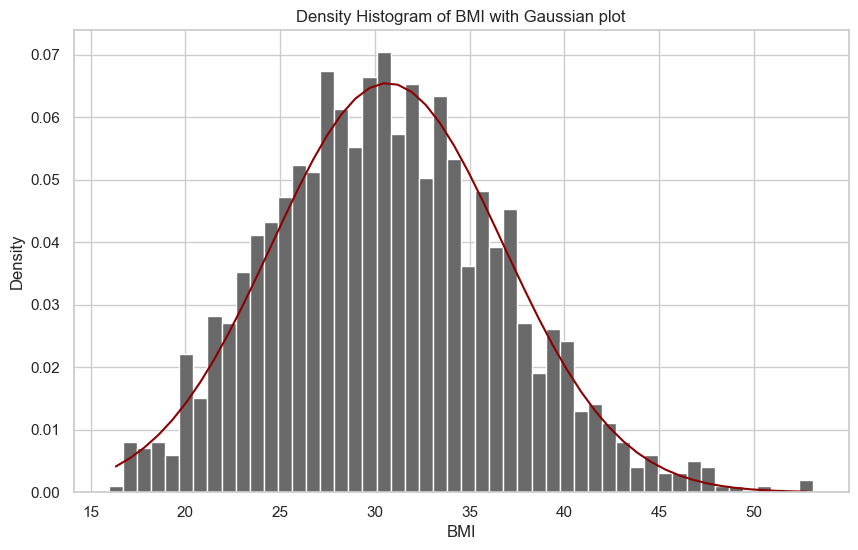

In [33]:
figure = plt.figure(figsize=(10,6))
axes = figure.add_subplot(1, 1, 1)
n, bins, patches = axes.hist(insurance['bmi'], color="DimGray", density=True, bins=50)
axes.set_xlabel("BMI")
axes.set_ylabel("Density")
axes.set_title("Density Histogram of BMI with Gaussian plot")

xs = [(b2 + b1)/2 for b1, b2 in zip(bins, bins[1:])]
mean = np.mean(insurance['bmi'])
std  = np.std(insurance['bmi'])
ys = [norm.pdf(k, loc=mean, scale=std) for k in xs]
axes.plot(xs, ys, color="darkred")
plt.show()
plt.close()

Though the Gaussian distribution looks close to a good fit, we can still see that it is slightly underestimating BMI values from 15 to 30, while it is slightly overestimating BMI values from 30 to 50. Thus, we can say that our data does not quite seem to follow a Gaussian distribution.

Now we will use try a Log-Gaussian distribution instead. We predict that the Log-Gaussian distribution overlayed on top of our empirical data will look like a better fit.

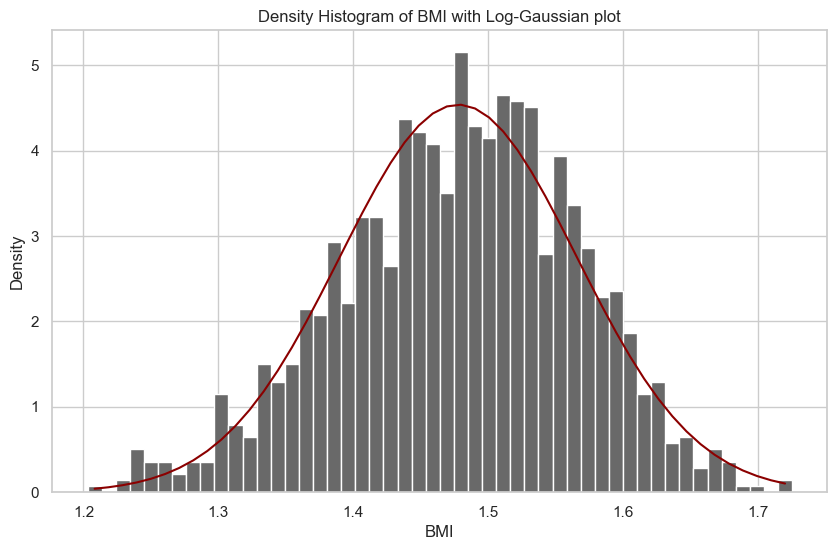

In [34]:
insurance['log_bmi'] = insurance['bmi'].apply(lambda x: np.log10(x))

figure = plt.figure(figsize=(10,6))
axes = figure.add_subplot(1, 1, 1)
n, bins, patches = axes.hist(insurance['log_bmi'], color="DimGray", density=True, bins=50)
axes.set_xlabel("BMI")
axes.set_ylabel("Density")
axes.set_title("Density Histogram of BMI with Log-Gaussian plot")

xs = [(b2 + b1)/2 for b1, b2 in zip(bins, bins[1:])]
mean = np.mean(insurance['log_bmi'])
std  = np.std(insurance['log_bmi'])
ys = [norm.pdf(k, loc=mean, scale=std) for k in xs]
axes.plot(xs, ys, color="darkred")
plt.show()
plt.close()

We observe that the Log-Gaussian distribution seems like maybe a slightly better fit for the data, though not much better than the regular Gaussian distribution. This model seems to slightly overpredict lower BMIs while slightly underpredicting larger BMIs.

In order to compare the fit of the regular Gaussian distribution and the Log-Gaussian distribution, we can use a QQ-plot. First we make a QQ-plot for the regular Gaussian distribution.

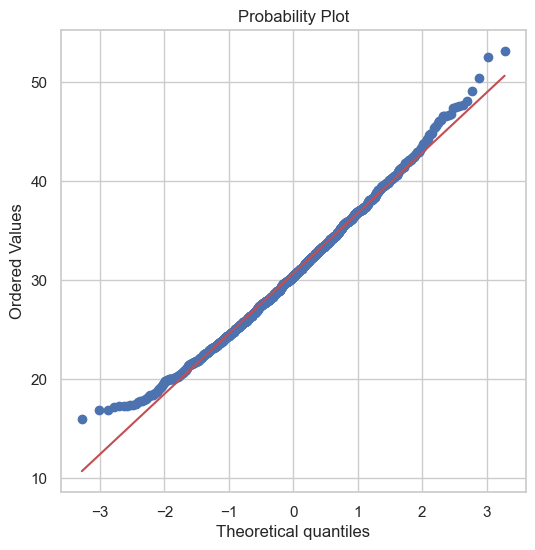

In [35]:
figure = plt.figure(figsize=(6, 6))
axes = figure.add_subplot(1, 1, 1)
stats.probplot(insurance["bmi"], dist="norm", plot=axes)
plt.show()
plt.close()

We observe that our plotted empirical and theoretical quantiles line up somewhat well, but there are discrepancies at lower and higher theoretical quantiles. This is what we expected, as the we predicted that the Gaussian distribution was not quite the right fit.

Now we try the Log-Gaussian distribution. We predict that the empirical data will follow the Log-Gaussian distribution closer than the Gaussian distribution.

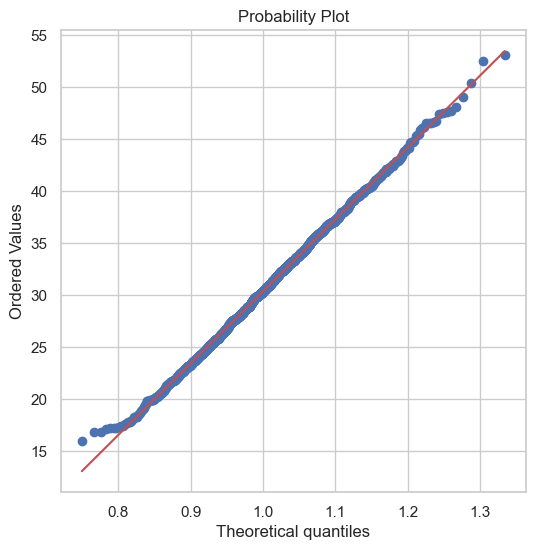

In [36]:
figure = plt.figure(figsize=(6, 6))
axes = figure.add_subplot(1, 1, 1)
shape_parameter=std
stats.probplot(insurance["bmi"], dist=stats.lognorm(s=shape_parameter), plot=axes)
plt.show()
plt.close()

Our prediction seems correct, as our data follows the Log-Gaussian distribution slightly more closely than the Gaussian distribution. We observe less deviation from the y=x line at low and high theoretical quantiles.

## 3.4.b Predictions

Now we wish to make some predictions. 

1. What is the probability of a random person having a BMI greater than 40?

In order to answer this question, we use the Survival Function.

In [37]:
mean = np.mean(insurance["bmi"])
std  = np.std(insurance["bmi"])

stats.norm.sf(40, mean, std)

0.06280833831797722

Our model predicts that there is only a 6.2% percent chance that a random person will have a BMI greater than 40.

2. What is the probability of a random person having a BMI less than 40?

In order to answer this question, we use the Cumulative Distribution Function (CDF). We predict that the percent chance of someone having a BMI less than 40 will be 93.7%, since we just found that our model predicts there is a 6.2% chance of the BMI being greater than 40.

In [38]:
stats.norm.cdf(40, mean, std)

0.9371916616820228

Our model predicts that there is 93.7% chance that a random person will have a BMI less than 40. Our prediction was correct, as the chance of someone having a BMI less than 40 plus the chance of someone having a BMI greater than 40 will sum to 100%.

We will use this same principle to answer the question below.

3. What is the probability of a random person having a BMI between 20 and 25?

In order to answer this question, we use the Cumulative Distribution Function (CDF). However, this time we subtract the likelihood of the CDF of 25 from the CDF of 20.

In [39]:
stats.norm.cdf(25,mean,std) - stats.norm.cdf(20,mean,std)

0.13630978902624014

Our model predicts that there is a 13.63% chance of a random person having a BMI between 20 and 25.